# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [2]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [4]:
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [5]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 1s 3ms/step - loss: 0.3043 - accuracy: 0.9136 - val_loss: 0.1349 - val_accuracy: 0.9635
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.1324 - accuracy: 0.9616 - val_loss: 0.0908 - val_accuracy: 0.9757
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9739 - val_loss: 0.0841 - val_accuracy: 0.9767
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9807 - val_loss: 0.0878 - val_accuracy: 0.9758
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.0782 - val_accuracy: 0.9758
Epoch 6/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0645 - val_accuracy: 0.9820
Epoch 7/10
422/422 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0643 - val_accuracy: 0.9807
Epoch 

Show the performance of the model

Test score: 0.06296776980161667
Test accuracy: 0.9807999730110168


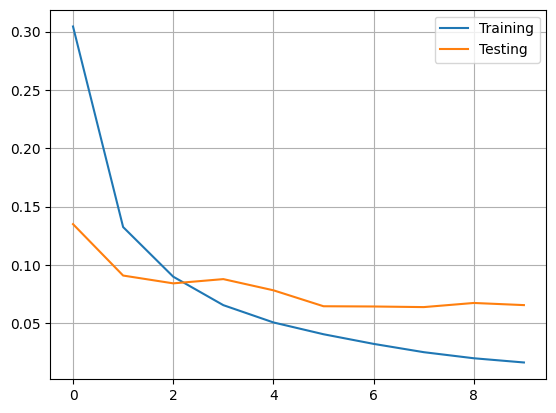

In [6]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [7]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 0s 1ms/step


array([[ 970,    0,    0,    1,    0,    0,    4,    1,    3,    1],
       [   0, 1129,    2,    1,    0,    1,    2,    0,    0,    0],
       [   4,    3, 1008,    1,    2,    0,    2,    6,    6,    0],
       [   0,    1,   10,  985,    0,    3,    0,    1,    4,    6],
       [   1,    1,    3,    1,  962,    0,    3,    1,    1,    9],
       [   3,    0,    0,    6,    1,  868,    6,    2,    5,    1],
       [   4,    2,    1,    1,    2,    2,  946,    0,    0,    0],
       [   0,    3,    7,    2,    0,    0,    0, 1009,    2,    5],
       [   4,    0,    3,    4,    5,    2,    3,    2,  948,    3],
       [   3,    3,    0,    4,    9,    2,    0,    5,    0,  983]])